### Creator - Aditya S. Yadav

## Importing Necessary Libraries

In [128]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [129]:
df = pd.read_csv('IRIS (1).csv')

In [130]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [131]:
df.shape

(150, 5)

## Checking Null Values

In [132]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Checking Duplicated rows and then dropping in next steps

In [133]:
df.duplicated().sum()

3

In [134]:
df.drop_duplicates(inplace=True)

In [135]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [136]:
heat = df.corr(numeric_only=True)

In [137]:
heat

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


<Axes: >

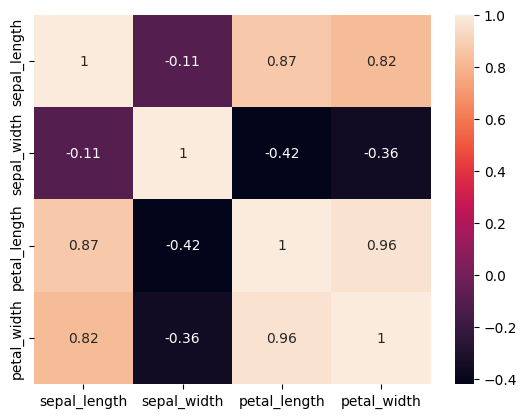

In [138]:
sns.heatmap(heat,annot=True)

In [139]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Checking the Distribution of each feature

Plotting histogram for column: sepal_length


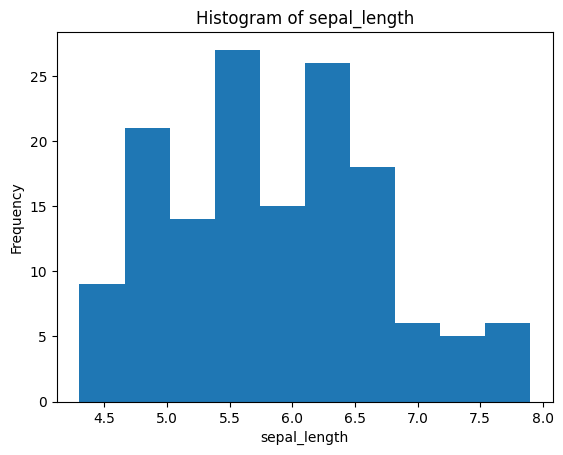

Plotting histogram for column: sepal_width


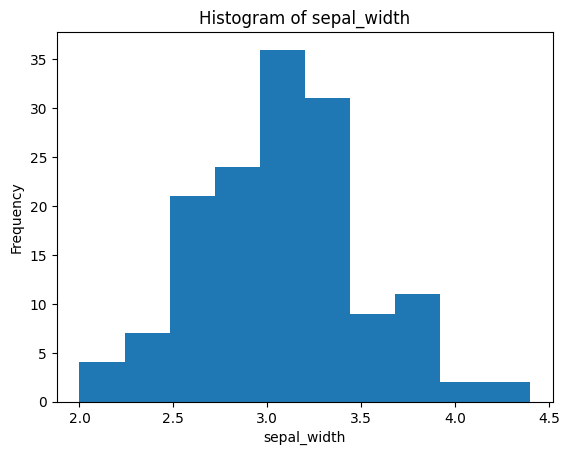

Plotting histogram for column: petal_length


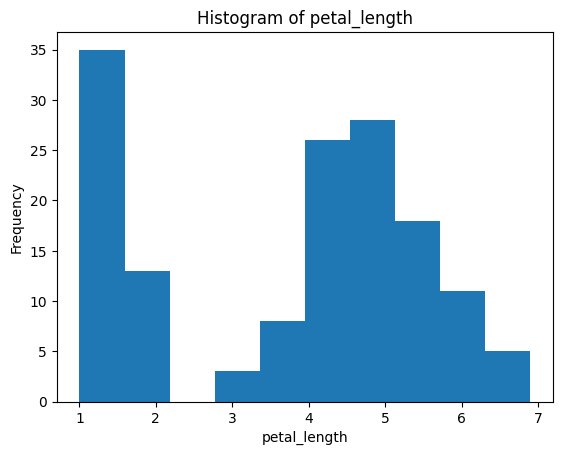

Plotting histogram for column: petal_width


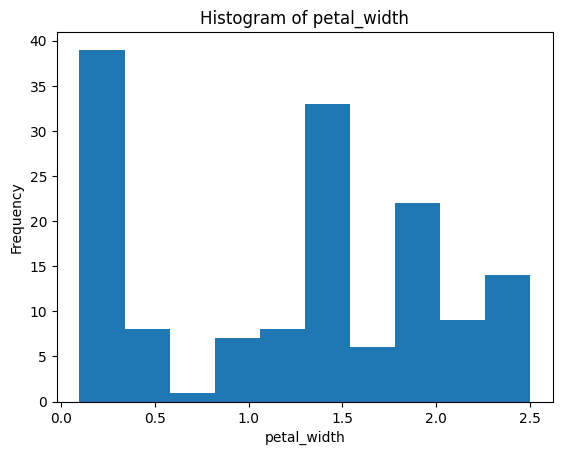

In [140]:
for i in df.columns[0:4]:
    plt.hist(x=df[i])
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    print(f'Plotting histogram for column: {i}')
    plt.show()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64


<Axes: ylabel='count'>

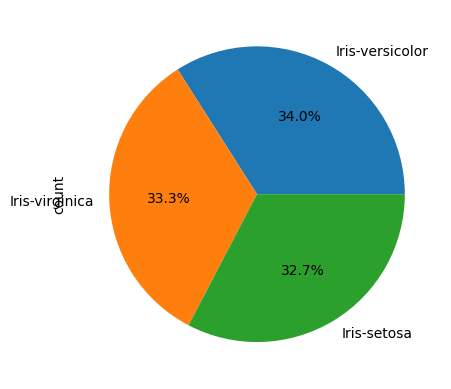

In [141]:
print(df['species'].value_counts())
df['species'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## From above we can conclude that data is somewhat equally distributed 

## Defining Independent and Dependent

In [142]:
X = df.drop(['species'],axis=1)
y = df['species']

## Splitting The DATA

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=128)

In [144]:
X_train.shape

(117, 4)

In [145]:
X_test.shape

(30, 4)

## Transforming the training data to common range by performing StandardScaler

In [146]:
trf1 = ColumnTransformer([
    ('Scale',StandardScaler(),slice(0,5))],
                         remainder='passthrough')   

## Performing LabelEncoder to Encode the 3 categories in output column

In [147]:
le = LabelEncoder()

le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [148]:
trf2 = LogisticRegression()

In [149]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

In [150]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scale', StandardScaler(),
                                                  slice(0, 5, None))])),
                ('trf2', LogisticRegression())])

## Training the Model

In [151]:
y_pred = pipe.predict(X_test)

In [152]:
print(accuracy_score(y_pred,y_test))

0.9666666666666667


In [153]:
y_pred

array([2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0,
       2, 0, 1, 1, 1, 2, 1, 0])

In [154]:
y_test

array([2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0,
       2, 0, 1, 1, 1, 2, 1, 0])

### Cross Validation Score

In [155]:
cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')

In [156]:
print("Mean Accuracy:", np.mean(cv_scores))

Mean Accuracy: 0.9588505747126437


In [157]:
## Testing the model with new Data

In [158]:
Data = {'sepal_length':[3.4],'sepal_width':[4.5],'petal_length':[5.4],'petal_width':[4.3]}
data = pd.DataFrame(Data)     

In [159]:
category = pipe.predict(data)
print('Category is:',category[0])

Category is: 2
